In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv


--2025-06-25 02:07:51--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   514KB/s    in 1.0s    

2025-06-25 02:07:53 (514 KB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", 	"Unnamed: 3",	"Unnamed: 4"], axis=1)

In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df['target'] = df['labels'].map({'ham':0, 'spam':1})

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [ ]:
idx = 1
word2idx = {'<PAD>': 0}

In [ ]:
for i, row in df_train.iterrows():
  tokens =  row['data'].lower().split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx +=1


In [ ]:
word2idx

{'<PAD>': 0,
 'not': 1,
 'heard': 2,
 'from': 3,
 'u4': 4,
 'a': 5,
 'while.': 6,
 'call': 7,
 'me': 8,
 'now': 9,
 'am': 10,
 'here': 11,
 'all': 12,
 'night': 13,
 'with': 14,
 'just': 15,
 'my': 16,
 'knickers': 17,
 'on.': 18,
 'make': 19,
 'beg': 20,
 'for': 21,
 'it': 22,
 'like': 23,
 'u': 24,
 'did': 25,
 'last': 26,
 'time': 27,
 '01223585236': 28,
 'xx': 29,
 'luv': 30,
 'nikiyu4.net': 31,
 'hi': 32,
 'darlin': 33,
 'i': 34,
 'hope': 35,
 'you': 36,
 'had': 37,
 'nice': 38,
 'wish': 39,
 'come': 40,
 'cant': 41,
 'wait': 42,
 'to': 43,
 'see': 44,
 'love': 45,
 'fran': 46,
 'ps': 47,
 'want': 48,
 'dirty': 49,
 'anal': 50,
 'sex': 51,
 'and': 52,
 '10': 53,
 'man': 54,
 'gang': 55,
 'bang': 56,
 'no': 57,
 'da:)he': 58,
 'is': 59,
 'stupid': 60,
 'da..always': 61,
 'sending': 62,
 'this:)don': 63,
 'believe': 64,
 'any': 65,
 'of': 66,
 'those': 67,
 'message.pandy': 68,
 'mental:)': 69,
 'wait,': 70,
 'do': 71,
 'know': 72,
 'if': 73,
 'wesleys': 74,
 'in': 75,
 'town?': 76,

In [ ]:
len(word2idx)

10624

In [ ]:
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [ ]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row['data'].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [ ]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [ ]:
def data_generator(X, y, batch_size=32):
  X, y = shuffle(X,y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i in range(n_batches):
    end = min((i + 1) * batch_size, len(y))
    X_batch = X[i * batch_size:end]
    y_batch = y[i * batch_size:end]
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]

      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    X_batch = torch.from_numpy(np.array(X_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield X_batch, y_batch

for inputs, targets in data_generator(train_sentences_as_int, df_train.target):
  print("inputs", inputs, "shape", inputs.shape)
  break

for inputs, targets in data_generator(test_sentences_as_int, df_test.target):
  print("inputs", inputs, "shape", inputs.shape)
  break



inputs tensor([[    0,     0,     0,  ...,   140,  1248,  3950],
        [    0,     0,     0,  ...,     0,  1246,  2975],
        [    0,     0,     0,  ...,  5536,    30,  1863],
        ...,
        [    0,     0,     0,  ...,    66,   990,  8222],
        [    0,     0,     0,  ..., 10236,   168,   268],
        [    0,     0,     0,  ...,  1447,   922,    93]]) shape torch.Size([32, 37])
inputs tensor([[   0,    0,    0,  ...,  536,   22, 2682],
        [   0,    0,    0,  ...,  124,  349,  834],
        [   0,    0,    0,  ...,  396,  140,  432],
        ...,
        [   0,    0,    0,  ...,  245,   40,  921],
        [   0,    0,    0,  ...,  291,  998, 9090],
        [   0,    0,    0,  ...,    0, 2108,  962]]) shape torch.Size([32, 32])


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class RNN(nn.Module):
  def __init__(self, b_vocabs, n_inputs, m_hidden, l_layers, k_outputs):
    super().__init__()
    self.V = b_vocabs
    self.D = n_inputs
    self.M = m_hidden
    self.L = l_layers
    self.K = k_outputs

    self.embed = nn.Embedding(self.V, self.D)

    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True
    )
    self.fc = nn.Linear(in_features=self.M, out_features=self.K)

  def forward(self, X):
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    out = self.embed(X)
    out, _ = self.rnn(out, (h0, c0))
    out, _ = torch.max(out,1)
    out = self.fc(out)
    return out

In [ ]:
model = RNN(len(word2idx), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(10624, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

train_gen = lambda: data_generator(train_sentences_as_int, df_train.target)
test_gen =  lambda: data_generator(test_sentences_as_int, df_test.target)

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      # print("inputs.shape:", inputs.shape, "targets.shape:", targets.shape)
      targets = targets.view(-1, 1).float()
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, 15)

Epoch 1/15, Train Loss: 0.5245,       Test Loss: 0.3837, Duration: 0:00:00.375849
Epoch 2/15, Train Loss: 0.3283,       Test Loss: 0.2933, Duration: 0:00:00.377148
Epoch 3/15, Train Loss: 0.2453,       Test Loss: 0.2221, Duration: 0:00:00.367221
Epoch 4/15, Train Loss: 0.1770,       Test Loss: 0.1763, Duration: 0:00:00.374630
Epoch 5/15, Train Loss: 0.1374,       Test Loss: 0.1542, Duration: 0:00:00.362396
Epoch 6/15, Train Loss: 0.1062,       Test Loss: 0.1360, Duration: 0:00:00.361479
Epoch 7/15, Train Loss: 0.0875,       Test Loss: 0.1307, Duration: 0:00:00.381394
Epoch 8/15, Train Loss: 0.0714,       Test Loss: 0.1192, Duration: 0:00:00.366189
Epoch 9/15, Train Loss: 0.0561,       Test Loss: 0.1138, Duration: 0:00:00.362019
Epoch 10/15, Train Loss: 0.0449,       Test Loss: 0.1106, Duration: 0:00:00.392786
Epoch 11/15, Train Loss: 0.0362,       Test Loss: 0.1155, Duration: 0:00:00.364517
Epoch 12/15, Train Loss: 0.0306,       Test Loss: 0.1135, Duration: 0:00:00.369517
Epoch 13/15, 

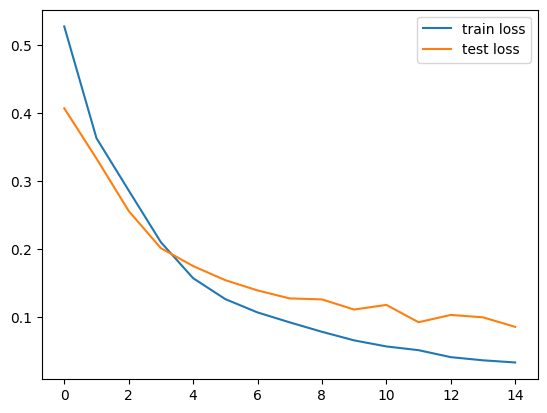

In [ ]:


# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()



In [ ]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9981, Test acc: 0.9717
